# Importation des modules

In [1]:
import xml.etree.cElementTree as et
from pylab import *
import matplotlib.pyplot as plt
import os
import geopandas as gpd
import pandas as pd
from haversine import haversine

In [2]:
"""-----------DANS CETTE PARTIE JE DÉTERMINE LA RUE LA PLUS CHARGÉ ENSUITE JE TRACE SON DÉBIT EN FONCTION DU TEMPS------"""


file1 = '/home/diyes/Documents/ECL-1-1/PE/TT-traffic-dataviz-master'+os.path.sep+"Etat_Troncons_Web_InfoTrafic_2019_04_11_00h00.xml"
tree = et.ElementTree(file = file1)
root = tree.getroot()

#Variables contenant les données de debit, de vitesse et de taux 
liste_debit = list()
liste_vitesse = list()
liste_taux = list()
vitesse_rue_max = [0, '', ''] # Je mets ici la vitesse maximale enregistrée et la rue correspondante
deb_max_rue = [0, '', ''] #Je mets ici le débit maximal enregistré et la rue correspondante.
trouve_deb = False
trouve_vitesse = False

for i in root.findall('troncon_web_infotrafic'):
    for j in i.findall('point_de_mesure'):
        deb = int(j.find('debit').text)
        if deb > deb_max_rue[0]:
            deb_max_rue[0] = deb
            trouve_deb = True
        if j.find('vitesse') != None:
            vitesse = int(j.find('vitesse').text)
            if vitesse > vitesse_rue_max[0]:
                vitesse_rue_max[0] = vitesse
                trouve_vitesse = True
    if trouve_deb == True: # j'enregistre le code et le nom de la rue ayant le débit le plus élevé
        deb_max_rue[1] = i.find('libelle').text
        deb_max_rue[2] = i.find('code').text   
        trouve_deb = False
    if  trouve_vitesse == True: # j'enregistre le code et le nom de la rue ayant la vitesse la plus élevée
        vitesse_rue_max[1] = i.find('libelle').text
        vitesse_rue_max[2] = i.find('code').text  
        trouve_vitesse = False   
    


print("La rue la plus chargée est : ",deb_max_rue[1]," et son débit est de :",deb_max_rue[0], " correspondant au code", deb_max_rue[2],"\n")
print("Libellé de la rue ayant la vitesse maximale : "+vitesse_rue_max[1]+"  "+" code :"+vitesse_rue_max[2])


La rue la plus chargée est :  R MOUILLARD  et son débit est de : 2820  correspondant au code LYO02207 

Libellé de la rue ayant la vitesse maximale : ACCES A 42 DE A46 NORD ALYON   code :LYO02387


In [3]:
"""---Détermination des paramètres du débit et du taux d'occupation pour la rue la plus chargée---"""
for m in range(6):
    for n in range(60):
        x = (str(m) + 'h').zfill(3)
        y = str(n).zfill(2)
        file1 = '/home/diyes/Documents/ECL-1-1/PE/grandlyon/state_data/Etat_Troncons_Web_InfoTrafic_2019_04_11_' + x + y +'.xml'
        tree = et.ElementTree(file = file1)
        root = tree.getroot()
        
        for i in root.findall('troncon_web_infotrafic'):
            if i.find('libelle').text == deb_max_rue[1] and i.find('code').text == deb_max_rue[2]:
                for j in i.findall('point_de_mesure'):
                    deb = int(j.find('debit').text)
                    taux = int(j.find('taux').text)
                    liste_debit.append(deb)
                    liste_taux.append(taux)
            if i.find('libelle').text == vitesse_rue_max[1] and i.find('code').text == vitesse_rue_max[2]:
                for j in i.findall('point_de_mesure'):
                    vit = int(j.find('vitesse').text)
                    liste_vitesse.append(vit)


while -1 in liste_vitesse:
    liste_vitesse.remove(-1)
    
while -1 in liste_debit:
    liste_debit.remove(-1)
    
while -1 in liste_taux:
    liste_taux.remove(-1)

print("Ordres de grandeur du débit, taux d'occupation et vitesse :\n")    
print(liste_debit[0:10],"\n")
print(liste_taux[0:10],"\n")
print(liste_vitesse[0:10])


Ordres de grandeur du débit, taux d'occupation et vitesse :

[2820, 1980, 2880, 2820, 1980, 2640, 1560, 1980, 2160, 2400] 

[17, 19, 32, 26, 17, 17, 10, 10, 13, 14] 

[119, 86, 111, 119, 86, 111, 92, 75, 92, 75]


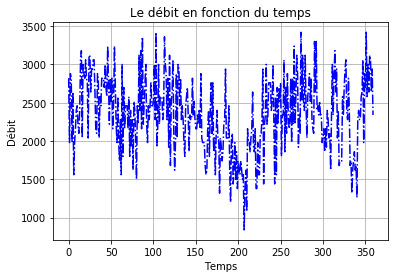

In [4]:
"""------AFFICHAGE DU DÉBIT EN FONCTION DU TEMPS POUR LA RUE LA PLUS CHAGÉE---------"""

x_temps_debit = array(range(len(liste_debit))) 
y_deb = array(liste_debit)

plot(x_temps_debit, y_deb, "b-.")
xlabel("Temps")
ylabel("Débit")
title("Le débit en fonction du temps")
grid()
show()


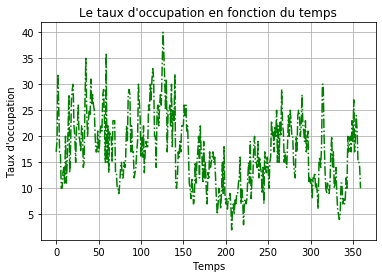

In [5]:
"""------AFFICHAGE DU DÉBIT EN FONCTION DU TEMPS POUR LA RUE LA PLUS CHAGÉE---------"""
x_temps_taux = array(range(len(liste_taux))) 
y_taux = array(liste_taux)

plot(x_temps_taux, y_taux, "g-.")
xlabel("Temps")
ylabel("Taux d'occupation")
title("Le taux d'occupation en fonction du temps")
grid()
show()

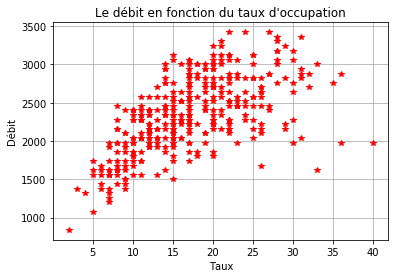

In [6]:
"""----- AFFICHAGE DU DÉBIT PAR RAPPORT AU TAUX D'OCCUPATION POUR LA RUE LA PLUS CHARGÉE-----"""

plot(y_taux, y_deb, "r*")
xlabel("Taux")
ylabel("Débit")
title("Le débit en fonction du taux d'occupation")
grid()
show()

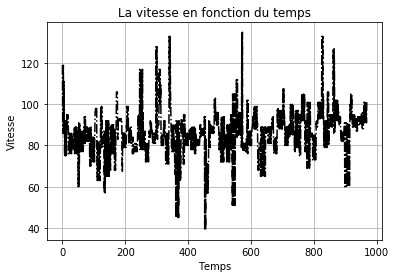

In [7]:

"""----- AFFICHAGE DE LA VITESSE DANS LA RUE OU ELLE EST LA PLUS HAUTE-----"""
x_temps_vitesse = array(range(len(liste_vitesse))) 
y_vitesse =  array(liste_vitesse)

plot(x_temps_vitesse, y_vitesse, "k-.")
xlabel("Temps")
ylabel("Vitesse")
title("La vitesse en fonction du temps")
grid()
show()

In [8]:
"""------CLASSEMENT DU DÉBIT DES RUES--------"""

file1 = '/home/diyes/Documents/ECL-1-1/PE/TT-traffic-dataviz-master'+os.path.sep+"Etat_Troncons_Web_InfoTrafic_2019_04_11_00h00.xml"
tree = et.ElementTree(file = file1)
root = tree.getroot()


liste_infos = list()
deb = 0
code = ''
libelle = ''

for i in root.findall('troncon_web_infotrafic'):
    for j in i.findall('point_de_mesure'):
        deb = int(j.find('debit').text)
    code = i.find('code').text
    libelle = i.find('libelle').text    
    liste_infos.append([deb, code, libelle])


liste_index = list() # je crée une liste d'index pour recupérer l'index des rues dont le débit est négatif ou nul
for i in enumerate(liste_infos):
    if i[1][0] <= 0:
        liste_index.append(i[0])

new_liste_infos = [] # Je crée une nouvelle liste qui ne contient pas les débits négatifs ou nuls
for i in range(0, len(liste_infos)):
    if i in liste_index:
        pass
    else:
        new_liste_infos.append(liste_infos[i])
        
#Cette fonction renvoie directement les 25 rues les plus chargées        
def rues_hauts_debits(liste_debits): 
    temp_0 = []
    for j in liste_debits:
        temp_0.append(j[0]) 

    temp_0 =  sorted(temp_0)    
    temp_1 = []
    for i in range(1,len(temp_0)):
        if temp_0[-i] in temp_1:
            pass
        else:
            temp_1.append(temp_0[-i])

    liste_finale = []        
    for j in temp_1:
        for k in new_liste_infos:
            if j == k[0]:
                liste_finale.append(k)
                break
    return liste_finale    
classment_deb = rues_hauts_debits(new_liste_infos)
print("Les ",len(classment_deb)," rues les plus chargées sont : \n")
for j in classment_deb:
    print("--> ",j[2]," : ",j[0],"(",j[1],")\n")

Les  25  rues les plus chargées sont : 

-->  R MOUILLARD  :  2820 ( LYO02207 )

-->  N383_PORTE DU MOULIN_PORTE DE GERLAND  :  1920 ( LYO0151 )

-->  ENTREE RD12/BUS _ SOLAIZE  :  1620 ( LYO01083 )

-->  BD DU VALVERT  :  1380 ( LYO00709 )

-->  A43_JONCTION A43/N383_SORTIE MAI 1945  :  1260 ( LYO0101 )

-->  N383_PORTE DE LA SOIE_PORTE DE MONTCHAT  :  1200 ( LYO0144 )

-->  SOLAIZE _ JONCTION A7N/A46S/A47  :  1140 ( LYO01085 )

-->  N383_PORTE DE CUSSET_PORTE DE LA SOIE  :  1080 ( LYO0143 )

-->  N383_PORTE DE CROIX LUIZET_PORTE DE CUSSET  :  1020 ( LYO0142 )

-->  A7N_JONCTION A7/A450_ST FONS  :  960 ( LYO0123 )

-->  PONT GEORGES CLEMENCEAU  :  900 ( LYO00572 )

-->  A7N_LA SAULAIE_PIERRE BENITE NORD  :  840 ( LYO0121 )

-->  A43_SORTIE  8 MAI 1945_PORTE DES ALPES  :  780 ( LYO0102 )

-->  N383_PORTE DES ETATS-UNIS_PORTE DU MOULIN A VENT  :  720 ( LYO0150 )

-->  QU JULES COURMONT  :  660 ( LYO00552 )

-->  R GARIBALDI  :  600 ( LYO00025 )

-->  QU JEAN MOULIN  :  540 ( LYO00550 )
